# IMPORTING LIBRARIES 

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

### Data Collection and and preprocessing

In [5]:
train_dir = 'C:/Users/Admin/Desktop/ds_&_da/capstone_project/train'
test_dir = 'C:/Users/Admin/Desktop/ds_&_da/capstone_project/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Adjust the target size as needed
    batch_size=32,           # Adjust batch size as needed
    class_mode='categorical' # Assuming you have multiple classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 32398 images belonging to 3 classes.
Found 10500 images belonging to 3 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))

# Step 5 - Output Layer
model.add(Dense(units=3, activation='softmax'))

# Compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust number of epochs as needed
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Training the CNN model

In [7]:
# Define the number of training and validation steps per epoch
train_steps = len(train_generator)
test_steps = len(test_generator)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=10,  # Adjust number of epochs as needed
    validation_data=test_generator,
    validation_steps=test_steps
)


Epoch 1/10
1013/1013 [==============================] - 658s 648ms/step - loss: 0.2617 - accuracy: 0.9061 - val_loss: 0.2024 - val_accuracy: 0.9280
Epoch 2/10
1013/1013 [==============================] - 589s 581ms/step - loss: 0.1617 - accuracy: 0.9460 - val_loss: 0.1895 - val_accuracy: 0.9292
Epoch 3/10
1013/1013 [==============================] - 604s 596ms/step - loss: 0.1236 - accuracy: 0.9606 - val_loss: 0.1249 - val_accuracy: 0.9590
Epoch 4/10
1013/1013 [==============================] - 620s 612ms/step - loss: 0.0974 - accuracy: 0.9685 - val_loss: 0.0996 - val_accuracy: 0.9650
Epoch 5/10
1013/1013 [==============================] - 588s 580ms/step - loss: 0.0726 - accuracy: 0.9763 - val_loss: 0.0740 - val_accuracy: 0.9754
Epoch 6/10
1013/1013 [==============================] - 596s 588ms/step - loss: 0.0612 - accuracy: 0.9793 - val_loss: 0.0798 - val_accuracy: 0.9767
Epoch 7/10
1013/1013 [==============================] - 599s 591ms/step - loss: 0.0506 - accuracy: 0.9836 - val_

### EVALUATION AND PREDICTION


329/329 [==============================] - 111s 338ms/step
Number of true classes: 10500
Number of predicted classes: 10500


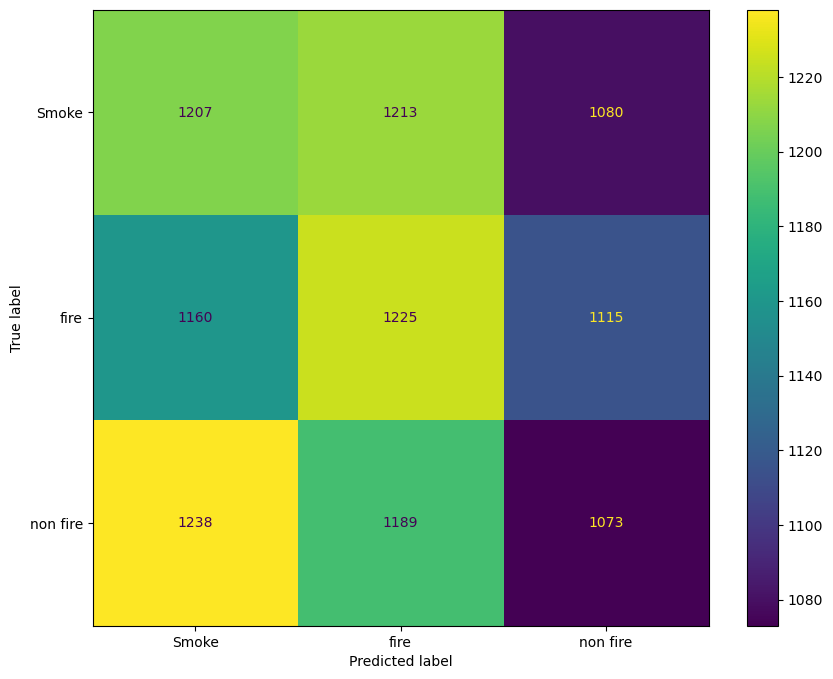

In [10]:

# Ensure the test generator is reset before predictions
test_generator.reset()

# Calculate the number of steps for predictions
test_steps = np.ceil(test_generator.samples / test_generator.batch_size)

# Generate predictions
predictions = model.predict(test_generator, steps=test_steps, verbose=1)

# Ensure predicted_classes and true_classes have the same length
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print lengths for debugging
print(f'Number of true classes: {len(true_classes)}')
print(f'Number of predicted classes: {len(predicted_classes)}')

# Check if there's a mismatch and handle it
if len(true_classes) != len(predicted_classes):
    print("Mismatch in number of samples. Please check the data.")
else:
    class_labels = list(test_generator.class_indices.keys())

    # Compute and plot the confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    disp.plot(ax=ax)
    plt.show()


In [11]:

# Generate a classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

       Smoke       0.33      0.34      0.34      3500
        fire       0.34      0.35      0.34      3500
    non fire       0.33      0.31      0.32      3500

    accuracy                           0.33     10500
   macro avg       0.33      0.33      0.33     10500
weighted avg       0.33      0.33      0.33     10500



### MODEL OPTIMIZATION  AND  TUNNING

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Use the augmented data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 32398 images belonging to 3 classes.
Found 10500 images belonging to 3 classes.


### Model Retraining

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the augmented data
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10
1013/1013 [==============================] - 826s 814ms/step - loss: 0.3359 - accuracy: 0.8790 - val_loss: 0.3214 - val_accuracy: 0.8910
Epoch 2/10
1013/1013 [==============================] - 685s 676ms/step - loss: 0.2359 - accuracy: 0.9203 - val_loss: 0.2596 - val_accuracy: 0.9096
Epoch 3/10
1013/1013 [==============================] - 748s 739ms/step - loss: 0.2121 - accuracy: 0.9292 - val_loss: 0.2257 - val_accuracy: 0.9240
Epoch 4/10
1013/1013 [==============================] - 661s 653ms/step - loss: 0.1940 - accuracy: 0.9357 - val_loss: 0.2165 - val_accuracy: 0.9252
Epoch 5/10
1013/1013 [==============================] - 663s 654ms/step - loss: 0.1844 - accuracy: 0.9386 - val_loss: 0.2146 - val_accuracy: 0.9263
Epoch 6/10
1013/1013 [==============================] - 697s 688ms/step - loss: 0.1780 - accuracy: 0.9403 - val_loss: 0.2376 - val_accuracy: 0.9160
Epoch 7/10
1013/1013 [==============================] - 704s 695ms/step - loss: 0.1673 - accuracy: 0.9454 - val_

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 10500 images belonging to 3 classes.


In [15]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

329/329 [==============================] - 113s 342ms/step - loss: 0.1816 - accuracy: 0.9435
Test Loss: 0.18156565725803375
Test Accuracy: 0.9435238242149353


In [16]:

# Predict the classes of the test data
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

329/329 [==============================] - 112s 340ms/step


### MODEL EVALUATION AND PERFORMANCE ANALYSIS

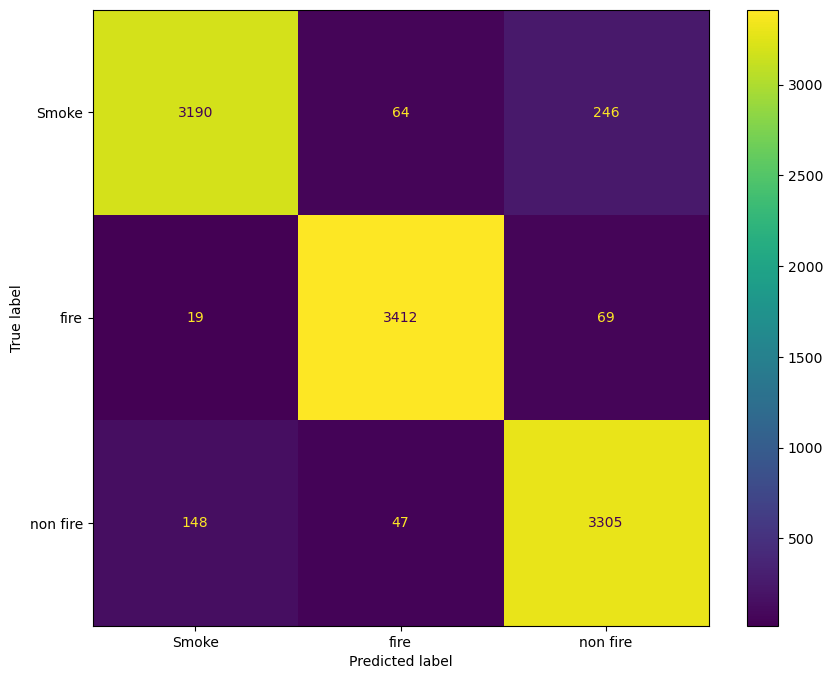

In [17]:

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax)
plt.show()

In [18]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       Smoke       0.95      0.91      0.93      3500
        fire       0.97      0.97      0.97      3500
    non fire       0.91      0.94      0.93      3500

    accuracy                           0.94     10500
   macro avg       0.94      0.94      0.94     10500
weighted avg       0.94      0.94      0.94     10500

